# Fraud check

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('D:/ExcelR/A14 decision trees/Fraud_check.csv')

In [3]:
data.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [4]:
data.rename(columns={'Undergrad':'UG','Marital.Status':'Marry',
                     'Taxable.Income':'Income','City.Population':'Pop',
                     'Work.Experience':'Exp'},inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   UG      600 non-null    object
 1   Marry   600 non-null    object
 2   Income  600 non-null    int64 
 3   Pop     600 non-null    int64 
 4   Exp     600 non-null    int64 
 5   Urban   600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
data['UG'].replace({'YES':1,'NO':0},inplace=True)
data['Urban'].replace({'YES':1,'NO':0},inplace=True)

In [7]:
data.head()

,UG,Marry,Income,Pop,Exp,Urban
0,0,Single,68833,50047,10,1
1,1,Divorced,33700,134075,18,1
2,0,Married,36925,160205,30,1
3,1,Single,50190,193264,15,1
4,0,Married,81002,27533,28,0


In [8]:
bins = [0,30001,np.inf]
names = ['Risky','Good']
data['Result'] = pd.cut(data['Income'],bins,labels=names)

In [9]:
data.head(20)

,UG,Marry,Income,Pop,Exp,Urban,Result
0,0,Single,68833,50047,10,1,Good
1,1,Divorced,33700,134075,18,1,Good
2,0,Married,36925,160205,30,1,Good
3,1,Single,50190,193264,15,1,Good
4,0,Married,81002,27533,28,0,Good
5,0,Divorced,33329,116382,0,0,Good
6,0,Divorced,83357,80890,8,1,Good
7,1,Single,62774,131253,3,1,Good
8,0,Single,83519,102481,12,1,Good
9,1,Divorced,98152,155482,4,1,Good


In [10]:
data['Result'].replace({'Good':1,'Risky':0},inplace=True)

In [11]:
data.head(20)

,UG,Marry,Income,Pop,Exp,Urban,Result
0,0,Single,68833,50047,10,1,1
1,1,Divorced,33700,134075,18,1,1
2,0,Married,36925,160205,30,1,1
3,1,Single,50190,193264,15,1,1
4,0,Married,81002,27533,28,0,1
5,0,Divorced,33329,116382,0,0,1
6,0,Divorced,83357,80890,8,1,1
7,1,Single,62774,131253,3,1,1
8,0,Single,83519,102481,12,1,1
9,1,Divorced,98152,155482,4,1,1


In [12]:
data = pd.concat([data,pd.get_dummies(data['Marry'])],axis=1)

In [13]:
data.head(10)

,UG,Marry,Income,Pop,Exp,Urban,Result,Divorced,Married,Single
0,0,Single,68833,50047,10,1,1,0,0,1
1,1,Divorced,33700,134075,18,1,1,1,0,0
2,0,Married,36925,160205,30,1,1,0,1,0
3,1,Single,50190,193264,15,1,1,0,0,1
4,0,Married,81002,27533,28,0,1,0,1,0
5,0,Divorced,33329,116382,0,0,1,1,0,0
6,0,Divorced,83357,80890,8,1,1,1,0,0
7,1,Single,62774,131253,3,1,1,0,0,1
8,0,Single,83519,102481,12,1,1,0,0,1
9,1,Divorced,98152,155482,4,1,1,1,0,0


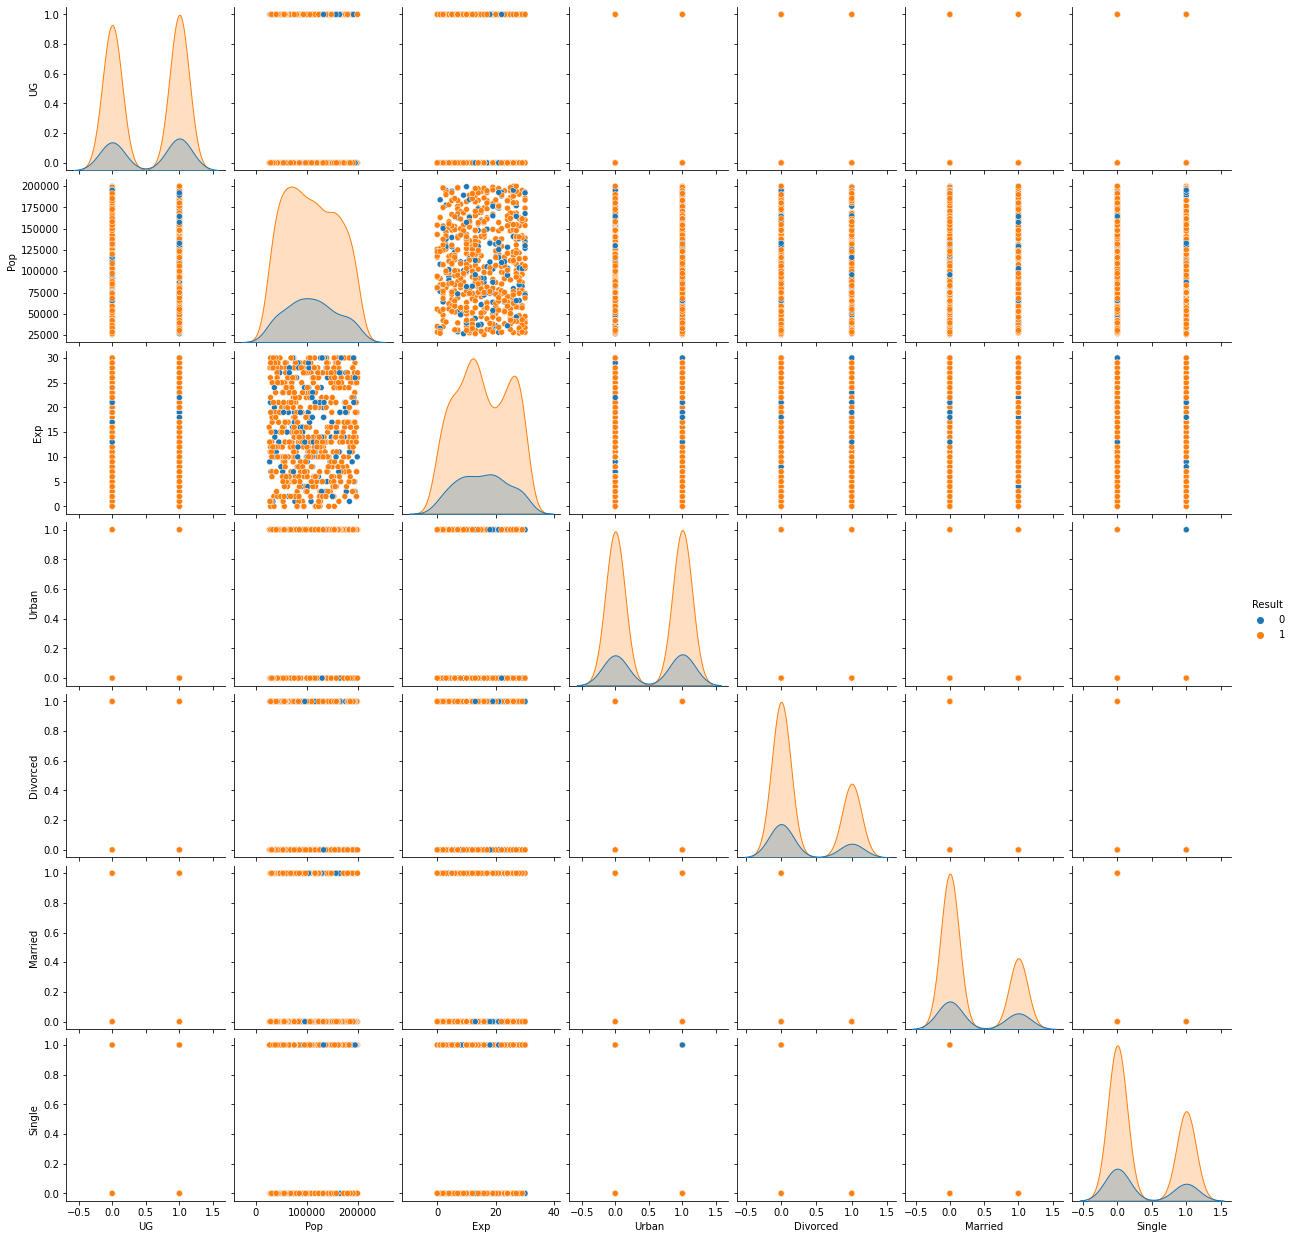

In [17]:
sns.pairplot(data=data.loc[:,['UG','Pop','Exp','Urban','Divorced','Married','Single','Result']],hue='Result')

In [25]:
import matplotlib.pyplot as plt

In [26]:
plotdata = data.loc[:,['UG','Urban','Divorced','Married','Single','Result']]

<AxesSubplot:xlabel='Single', ylabel='count'>

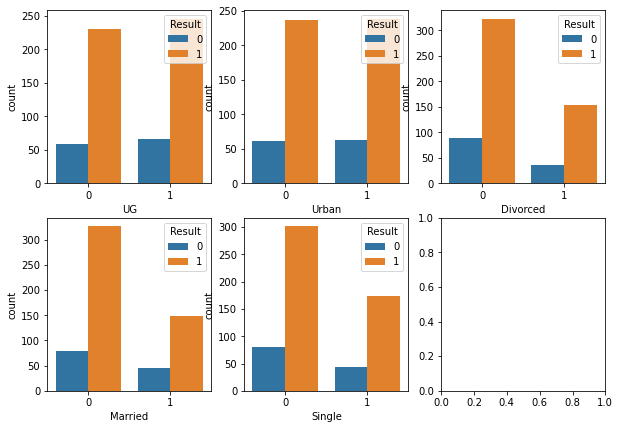

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(10, 7))
sns.countplot(data=plotdata,x='UG',hue='Result',ax=axes[0,0])
sns.countplot(data=plotdata,x='Urban',hue='Result',ax=axes[0,1])
sns.countplot(data=plotdata,x='Divorced',hue='Result',ax=axes[0,2])
sns.countplot(data=plotdata,x='Married',hue='Result',ax=axes[1,0])
sns.countplot(data=plotdata,x='Single',hue='Result',ax=axes[1,1])

In [56]:
x = data.iloc[:, [0,3,4,5,7,8,9]].values
y = data.iloc[:, 6].values

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x)

In [58]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [59]:
y_pred = classifier.predict(X_train)

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y, y_pred)
print(cm)
accuracy_score(y, y_pred)

[[124   0]
 [  0 476]]


1.0